Idea from https://www.connectedpapers.com/about

Count #BibliographicCoupling (cite to mutual papers, -> ) and  #Co-citation (cited by mutual papers, <- ).




In [68]:
import pandas as pd
from ast import literal_eval
import numpy as np
from scipy.spatial.distance import euclidean, pdist, squareform
from os.path import join as os_join
import seaborn as sns
import matplotlib.pylab as plt


# pd.set_option('display.max_colwidth', None)


In [69]:
df = pd.read_csv("../data/processed/vis_dataset/vis_data.csv")


df["cite_to_list"] = df["cite_to_list"].apply(literal_eval)
df["cited_by_list"] =  df["cited_by_list"].apply(literal_eval)
df.shape

(1746, 21)

In [70]:
df.sample(2)

,Conference,Year,Title,DOI,id,cite_to_list,cited_by_list,Link,FirstPage,LastPage,...,Abstract,AuthorNames-Deduped,AuthorNames,AuthorAffiliation,InternalReferences,AuthorKeywords,AminerCitationCount_02-2020,XploreCitationCount - 2020-01,PubsCited,Award
769,SciVis,2012,Fuzzy Volume Rendering,10.1109/TVCG.2012.227,769,[498],[920],http://dx.doi.org/10.1109/TVCG.2012.227,2335,2344,...,In order to assess the reliability of volume r...,Nathaniel Fout;Kwan-Liu Ma,Nathaniel Fout;Kwan-Liu Ma,"University of California, Davis;University of ...",10.1109/TVCG.2007.70518;10.1109/TVCG.2010.211;...,"Uncertainty visualization, verifiable visualiz...",11.0,11.0,39.0,NaN
700,VAST,2011,Evaluation of large display interaction using ...,10.1109/VAST.2011.6102466,700,[],[],http://dx.doi.org/10.1109/VAST.2011.6102466,265,266,...,"Visual analytics, “the science of analytical r...",Jens Bauer;Sebastian Thelen;Achim Ebert,Jens Bauer;Sebastian Thelen;Achim Ebert,"Computer Graphics & HCI Lab, University of Kai...",NaN,NaN,1.0,0.0,5.0,NaN


# Calc similarity

In [71]:
def count_overlapping(list_1, list_2):
    return len( set.intersection(set(list_1), set(list_2)) )


def similarity_func(u, v):
    return count_overlapping(u[0],v[0])

def get_similarity_score(id_1, id_2, df_similarity):
    return df_similarity[id_1].loc[id_2]

def create_similarity_df(col, df, out_path = "../data/processed/vis_dataset/", write=True, id_col="id"):
    '''
        ex: col= "cited_by_list", df = df
    '''
    df_cited_by_list = df[[ col ]]
    df_cited_by_list.index = df[id_col]

    dists = pdist(df_cited_by_list, similarity_func)
    df_similarity = pd.DataFrame(squareform(dists), columns=df_cited_by_list.index, index=df_cited_by_list.index)
    if write:
        df_similarity.to_csv(os_join(out_path, "similarity_" + col + ".csv"), index=True)
    return df_similarity

## "cited by" similarity

In [72]:
df_similarity_cited_by = create_similarity_df(col = "cited_by_list", df=df, write=True)
df_similarity_cited_by

id,0,1,2,3,4,5,6,7,8,9,...,1736,1737,1738,1739,1740,1741,1742,1743,1744,1745
id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
## test
assert get_similarity_score(19, 21, df_similarity_cited_by) == 2.0, "Something went wrong!"

In [74]:
df_cited_by_similarity.columns

NameError: name 'df_cited_by_similarity' is not defined

## "cite to" similairity

In [ ]:
df_similarity_cite_to = create_similarity_df(col = "cite_to_list", df=df, write=True)
df_similarity_cite_to

## Combine cited_by and cite_to

In [ ]:
## config weights

cited_by_weight = 1
cite_to_weight = 1

In [100]:
df_similarity_combined = df_similarity_cited_by * 1 + df_similarity_cite_to * 1
df_similarity_combined

id,0,1,2,3,4,5,6,7,8,9,...,1736,1737,1738,1739,1740,1741,1742,1743,1744,1745
id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Check heat map

In [168]:
def plot_heatmap_sparse_matrix(matrix,  img_path=None):
    matrix = matrix.copy()
    matrix[matrix==0.0]=np.nan
    plt.figure(figsize=(15,10))

    plt.matshow(matrix,aspect='auto',  cmap='viridis', fignum=1)
    plt.colorbar()
    if img_path:
        plt.savefig(img_path)

    plt.show()

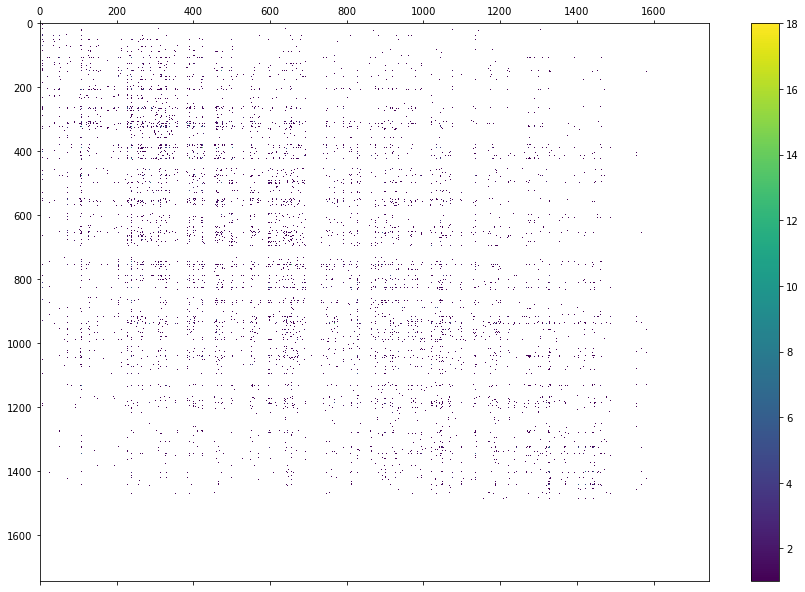

In [169]:
plot_heatmap_sparse_matrix(df_similarity_cited_by.values)

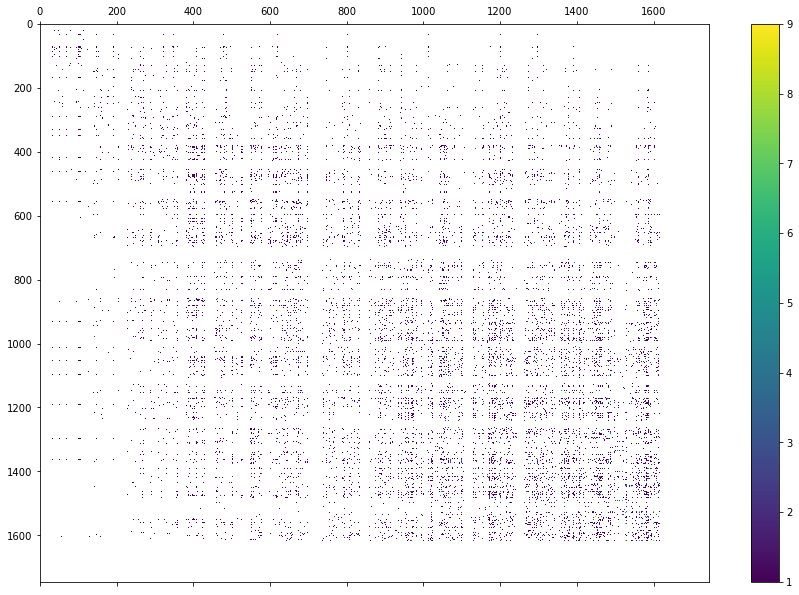

In [163]:
plot_heatmap_sparse_matrix(df_similarity_cite_to.values)

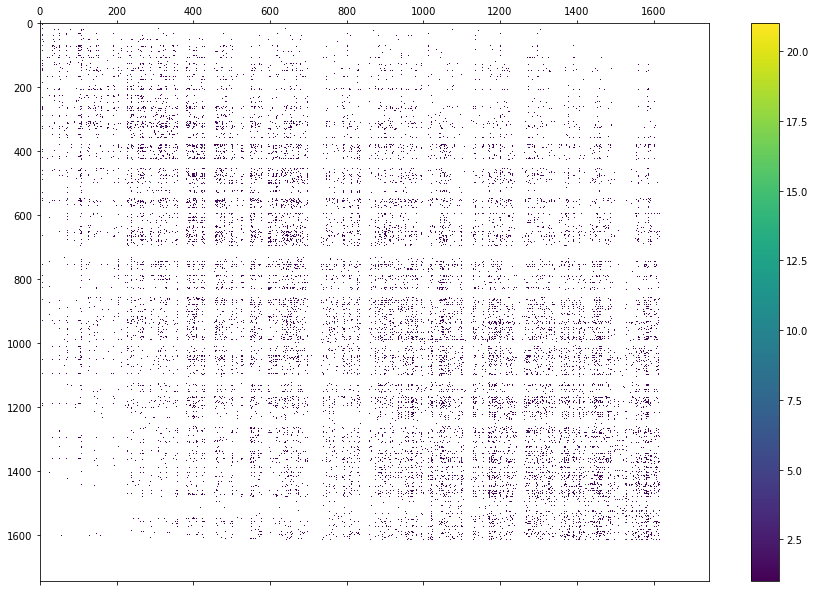

In [165]:
plot_heatmap_sparse_matrix(df_similarity_combined.values)